# LAB I

Course Machine Learning II

Name: Federico Ocampo Ortiz

## 1. Simulate any random rectangular matrix A.
<!--usar numpy.rand-->
- What is the rank and trace of A?  <!--realizar explicacion sencilla-->
- What is the determinant of A? 
- Can you invert A? How? <!--para invertir el det debe ser 0 investigar sobre la pseudoinversa-->
- How are eigenvalues and eigenvectors of A’A and AA’ related? What interesting differences can you notice between both? <!-- mostrar en código eigenvalores son los mismos, eigenvectores son distintos -->
- See [https://sites.cs.ucsb.edu/~mturk/Papers/jcn.pdf]


In [1]:
import pandas as pd
import numpy as np

In [2]:
A = np.random.rand(4,2)
A

array([[0.46569706, 0.67952909],
       [0.9501091 , 0.9517673 ],
       [0.04044613, 0.17583793],
       [0.88810328, 0.13416507]])

The rank of a matrix is the maximum number of columns or rows that are linearly independent. It's a measure of the linear independence of the columns or rows of a matrix. The rank of matrix `A` is 2 because is the smaller number between the dimensions of the matrix, which is 4 and 2. 

The trace is the sum along the diagonal of the matrix. The matrix `A` is not squared, but its possible to calculate the trace by adding the elements where row index and column index are equal. For matrix `A` the only elements that satisfy this condition are A(1,1) and A(2,2), so performing the addition of this elements results in the trace.

In [3]:
# rank
rank = np.linalg.matrix_rank(A)
print(f"Rank of matrix A is {rank}.")
trace = np.trace(A)
print(f"Trace of matrix A is {trace}.")

Rank of matrix A is 2.
Trace of matrix A is 1.4174643628379324.


In [4]:
#transpose
print(f"shape of matrix is {A.shape}")
print(f"shape of transpose matrix is {A.T.shape}")

shape of matrix is (4, 2)
shape of transpose matrix is (2, 4)


In [5]:
# determinant
try:
    det = np.linalg.det(A)
    det
except Exception as e:
    print(e)

Last 2 dimensions of the array must be square


It's not possible to calculate determinant of `matrix` because its not an squared matrix. When `linalg.det` is called, an exception is thrown: _Last 2 dimensions of the array must be square_. Because of that, its also not possible to calculate the inverse of `matrix` having in mind that for a matrix to have inverse is required a determinant of 0. 

However, its possible to calculate the pseudo-inverse of non-square matrix. The pseudo-inverse matrix is like an 'approximation' of the inverse and its useful to solve linear equations, among other things. The notation for the pseudo-inverse matrix of matrix A is A^+ . To calculate the pseudo-inverse, proceed as follows:

$ A^{+} = (A^T A)^{-1}A^T $

In [6]:
# inverse
inv = np.linalg.pinv(A)
inv

array([[-0.2868913 ,  0.07163654, -0.2015046 ,  1.20897199],
       [ 0.75251824,  0.60377592,  0.3157447 , -1.05491016]])

In [7]:
# eig1 is A*A'
eigval1, eigvec1 = np.linalg.eig(np.dot(A, A.T))
# eig2 is A'*A
eigval2, eigvec2 = np.linalg.eig(np.dot(A.T, A))


print(f"eigenvalue of A*A' \n{eigval1}")
print(f"eigenvalue of A'*A \n{eigval2}")

print(f"eigenvalue of A*A' \n{eigvec1}")
print(f"eigenvalue of A'*A \n{eigvec2}")

eigenvalue of A*A' 
[3.03264937e+00 2.93835018e-01 1.80857226e-16 1.08049422e-17]
eigenvalue of A'*A 
[3.03264937 0.29383502]
eigenvalue of A*A' 
[[-0.45525401  0.41291329  0.78715438 -0.31622126]
 [-0.7690208   0.22654737 -0.54804764  0.04000531]
 [-0.08248872  0.2014086  -0.2154315   0.9444589 ]
 [-0.44107415 -0.85884427  0.18336036  0.08000668]]
eigenvalue of A'*A 
[[ 0.76816422 -0.64025287]
 [ 0.64025287  0.76816422]]


It can be seen that there are 2 eigenvalues for $A*A'$ and 4 eigenvalues for $A'*A$. Though the ammount of eigenvalues differs, the first 2 eigenvalues (1.66970271 and 0.64724862) are the same for both matrices $A*A'$ and $A'*A$. On the other hand, the eigenvectors are completely different for both matrices.

## 2. Add a steady, well-centered picture of your face to a shared folder alongside your classmates.
- Edit your picture to be 256x256 pixels, grayscale (single channel)
- Plot your edited face <!--_subir en teams una foto de la cara, centrada_   _usar matplotlib_ -->
- Calculate and plot the average face of the cohorte
- How distant is your face from the average? How would you measure it?
<!--
    _como se calcula la distancia entre matrices_
    _usar numpy frobenius distancia_-->


In [8]:
# escalar todas las fotos a 256 y dejarlas en grayscale
from PIL import Image
from glob import glob
import os

photos_folder = glob("photos/*.jpg")
size = 256, 256
processed_folder_path = "photos_processed"

if not os.path.exists(processed_folder_path):
    os.makedirs(processed_folder_path)

for photo_file in photos_folder:
    try:
        im = Image.open(photo_file)
    except:
        pass
    im = im.resize(size)
    im = im.convert("L")
    im.save(os.path.join(processed_folder_path, os.path.basename(photo_file)), "JPEG")



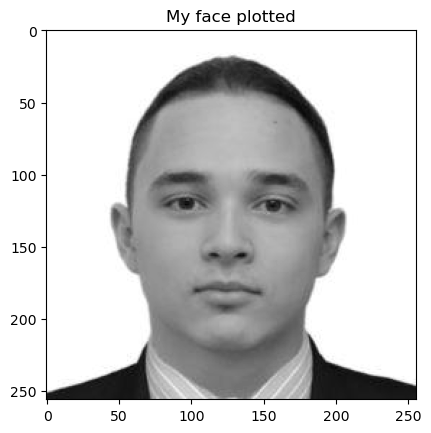

In [9]:
# plot my face
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

my_face_file = "FedericoOcampo.jpg"
processed_folder_path = "photos_processed"

img = mpimg.imread(os.path.join(processed_folder_path, my_face_file))

plt.imshow(img, cmap='gray')
plt.title("My face plotted")
plt.show()

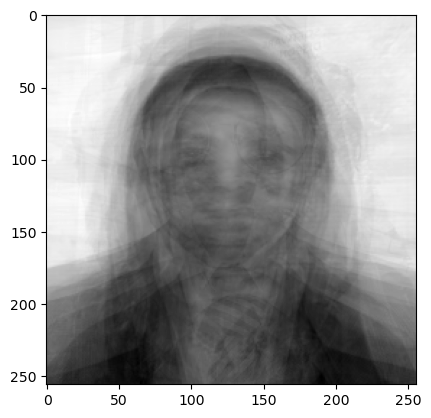

In [10]:
from glob import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

processed_folder_path = "photos_processed"

photos_folder = glob(os.path.join(processed_folder_path,"*.jpg"))

imgs = []
for photo_file in photos_folder:
    img = np.asarray(Image.open(photo_file))
    imgs.append(img)

averaged_face = np.average(imgs, axis=0)
avg_face_img = Image.fromarray(averaged_face)
avg_face_img.convert("L").save("averaged_face.jpg")
plt.imshow(averaged_face, cmap="gray")
plt.show()


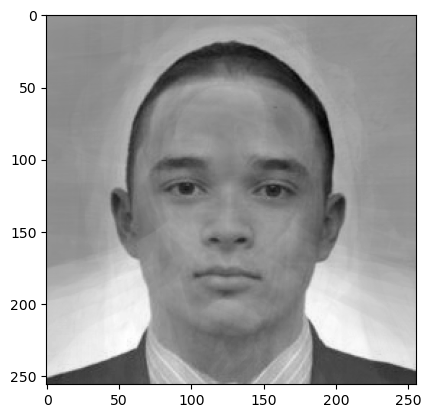

In [11]:
#my_face_file = "averaged_face.jpg"
my_face_file = "FedericoOcampo.jpg"
processed_folder_path = "photos_processed"

img = np.asarray(Image.open(os.path.join(processed_folder_path, my_face_file)))

#distance = np.subtract(img, averaged_face )
distance = img - averaged_face
plt.imshow(distance, cmap="gray")
plt.show()

In [12]:
dist = np.linalg.norm(img-averaged_face, ord="fro")
print(f"The frobenius distance between my face and the average is {dist}")

The frobenius distance between my face and the average is 16585.63067935615


## 3. Let’s create the unsupervised Python package  <!--_crear paquete, con clases, fit, fit_transform, hyperparms_-->
- Same API as scikit-learn: fit(), fit_transform(), transform(), hyperparams at init
- Manage dependencies with Pipenv or Poetry
- Implement SVD from scratch using Python and NumPy
- Implement PCA from scratch using Python and NumPy
[https://github.com/rushter/MLAlgorithms/blob/master/mla/pca.py,
https://github.com/patchy631/machine-learning/blob/main/ml_from_scratch/PCA_from_scratch.ip
ynb]
- Implement t-SNE from scratch using Python and NumPy
[https://nlml.github.io/in-raw-numpy/in-raw-numpy-t-sne/]


See folder mlpackage with the related code.

## 4. Apply SVD over the picture of your face, 
progressively increasing the number of singular values used. Is there any point where you can say the image is appropriately reproduced? How would you quantify how different your photo and the approximation are?
<!--_jugar con la reconstrucción, cambio de componentes_-->


In [13]:
import os
import sys
module_path = os.path.abspath(os.path.join('.','mlpackage'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [14]:
import sys
print(sys.path)

['g:\\Mi unidad\\Especialización ciencia de datos\\ML II\\ML_II_Lab_I', 'c:\\Users\\fede_\\anaconda3\\envs\\bd_prueba\\python39.zip', 'c:\\Users\\fede_\\anaconda3\\envs\\bd_prueba\\DLLs', 'c:\\Users\\fede_\\anaconda3\\envs\\bd_prueba\\lib', 'c:\\Users\\fede_\\anaconda3\\envs\\bd_prueba', '', 'c:\\Users\\fede_\\anaconda3\\envs\\bd_prueba\\lib\\site-packages', 'c:\\Users\\fede_\\anaconda3\\envs\\bd_prueba\\lib\\site-packages\\win32', 'c:\\Users\\fede_\\anaconda3\\envs\\bd_prueba\\lib\\site-packages\\win32\\lib', 'c:\\Users\\fede_\\anaconda3\\envs\\bd_prueba\\lib\\site-packages\\Pythonwin', 'g:\\Mi unidad\\Especialización ciencia de datos\\ML II\\ML_II_Lab_I\\mlpackage']


u.shape:(256, 256),s.shape:(256,),v.shape:(256, 256)
MSE for 240 components: 1.5505456067730142e-24
MSE for 200 components: 1.5343034784244827e-24
MSE for 50 components: 7.656828944804744
MSE for 20 components: 61.61786374269441
MSE for 18 components: 72.73099148675091
MSE for 10 components: 162.93816565576356


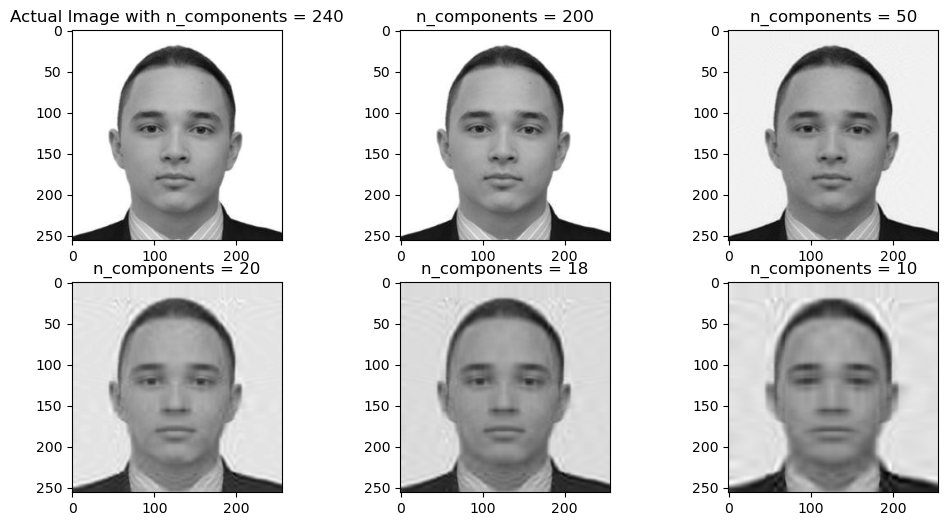

In [15]:
#my_face_file = "averaged_face.jpg"
my_face_file = "FedericoOcampo.jpg"
processed_folder_path = "photos_processed"

img = np.asarray(Image.open(os.path.join(processed_folder_path, my_face_file)))

u, s, v = np.linalg.svd(img, full_matrices=False)
print(f'u.shape:{u.shape},s.shape:{s.shape},v.shape:{v.shape}')
# plot images with different number of components
comps = [240, 200, 50, 20, 18, 10]
plt.figure(figsize=(12, 6))
  
for i in range(len(comps)):
    low_rank = u[:, :comps[i]] @ np.diag(s[:comps[i]]) @ v[:comps[i], :]

    squared_diff = (img - low_rank) ** 2
    mse = np.mean(squared_diff)
    print(f"MSE for {comps[i]} components: {mse}")
    if(i == 0):
        plt.subplot(2, 3, i+1),
        plt.imshow(low_rank, cmap='gray'),
        plt.title(f'Actual Image with n_components = {comps[i]}')
      
    else:
        plt.subplot(2, 3, i+1),
        plt.imshow(low_rank, cmap='gray'),
        plt.title(f'n_components = {comps[i]}')

It can be seen that with around 30 components is possible to approximate to original matrix. One way to measure the svd matrix is calculate the Mean Squared Error (MSE) between the resulting SVD matrix and the original matrix. The smaller the error, the better the approximation.

## 5. Train a naive logistic regression on raw MNIST images
to distinguish between 0s and 8s. We are calling this our baseline. What can you tell about the baseline performance?
<!--_usando scikit learn_-->

In [16]:
import pandas as pd

In [17]:
import sklearn

from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 


In [18]:
mnist = load_digits(return_X_y=False)
mnist

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [19]:
Y = pd.DataFrame(mnist.target)
Y_sub = Y[Y[0].isin([0,8])]
Y_sub

,0
0,0
8,8
10,0
18,8
20,0
...,...
1789,8
1790,8
1793,0
1794,8


In [20]:
X = pd.DataFrame(mnist.data)
X

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [21]:
X_sub = X.iloc[Y_sub.index]
X_sub

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0
10,0.0,0.0,1.0,9.0,15.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,10.0,13.0,3.0,0.0,0.0
18,0.0,0.0,10.0,7.0,13.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,14.0,5.0,0.0,0.0,0.0
20,0.0,0.0,3.0,13.0,11.0,7.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2.0,12.0,13.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789,0.0,0.0,8.0,16.0,3.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,16.0,10.0,1.0,0.0,0.0
1790,0.0,0.0,5.0,12.0,8.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,12.0,12.0,3.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0


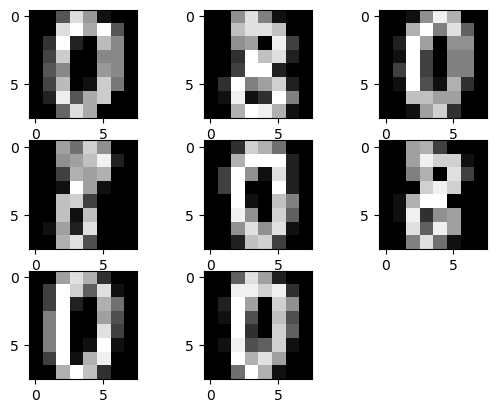

In [22]:
from matplotlib import pyplot

images = X_sub.values.reshape(-1,8,8)
for i in range(8):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(images[i], cmap="gray")
pyplot.show()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_sub, Y_sub, test_size=0.33, random_state=42)

In [24]:
y_train = y_train.squeeze()

In [25]:
model = LogisticRegression()
model

LogisticRegression()

In [26]:
model.fit(X_train, y_train)

LogisticRegression()

In [27]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 8, 0, 0, 0, 0, 0, 8, 0, 8, 0, 8, 8, 8, 0, 8, 8, 0, 0, 0, 8,
       8, 0, 8, 8, 0, 8, 0, 0, 8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 8, 0, 8, 8,
       8, 0, 8, 0, 0, 8, 8, 8, 8, 0, 8, 0, 0, 8, 0, 8, 8, 0, 0, 0, 8, 0,
       0, 0, 8, 0, 0, 8, 0, 8, 0, 0, 8, 0, 0, 8, 8, 8, 0, 8, 0, 8, 8, 8,
       8, 0, 8, 0, 0, 0, 8, 8, 0, 8, 8, 8, 8, 8, 0, 8, 8, 0, 0, 0, 8, 8,
       8, 8, 8, 8, 8, 0, 0])

In [28]:
accuracy_score(y_test, y_pred)

1.0

6. Now, apply dimensionality reduction using all your algorithms to train the model with only 2 features per image.
_ncomponents en 2_
- Plot the 2 new features generated by your algorithm
_usar matplotlib_
- Does this somehow impact the performance of your model?

In [29]:
import os
import sys
module_path = os.path.abspath(os.path.join('.','mlpackage'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [30]:
from mymlkit import pca
#from mymlkit.linear_models import LogisticRegression
from sklearn.linear_model import LogisticRegression
from mymlkit.metrics import accuracy

In [31]:
for s in ["svd", "eigen"]:
    p = pca.PCA(2, solver=s)

    # fit PCA with training data, not entire dataset
    p.fit(X_train)
    X_train_reduced = p.transform(X_train)
    X_test_reduced = p.transform(X_test)

    #model = LogisticRegression(lr=0.001, max_iters=2500)
    model = LogisticRegression()
    model.fit(X_train_reduced, y_train)
    predictions = model.predict(X_test_reduced)
    print("Classification accuracy for %s PCA: %s" % (s, accuracy_score(y_test, predictions)))

Classification accuracy for svd PCA: 1.0
Classification accuracy for eigen PCA: 1.0


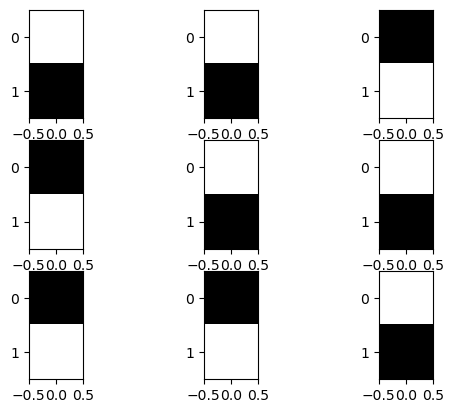

In [32]:
from matplotlib import pyplot

images = X_train_reduced.reshape(-1,2,1)
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(images[i], cmap="gray")
pyplot.show()

No, the accuracy for the model with only 2 components is the same as if it has the 64 original componentes. Although it's not possible to see the digits visually, the model is capable of predict correctly the classification of the digit.

7. Repeat the process above but now using the built-in algorithms in the Scikit-Learn library. How different are these results from those of your implementation? Why?

In [33]:
from sklearn.decomposition import PCA

p = PCA(2)

# fit PCA with training data, not entire dataset
p.fit(X_train)
X_train_reduced1 = p.transform(X_train)
X_test_reduced1 = p.transform(X_test)

#model = LogisticRegression(lr=0.001, max_iters=2500)
model = LogisticRegression()
model.fit(X_train_reduced1, y_train)
predictions = model.predict(X_test_reduced1)
print("Classification accuracy for PCA: %s" % (accuracy_score(y_test, predictions)))

Classification accuracy for PCA: 1.0


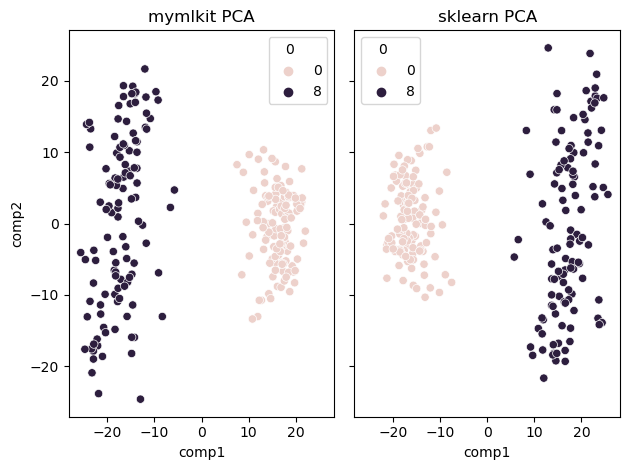

In [34]:
import seaborn as sns

fig,axes = plt.subplots(1,2, sharex="all", sharey="all")

sns.scatterplot(data=X_train_reduced, x=X_train_reduced[:,0], y=X_train_reduced[:,1], hue=y_train, ax=axes[0])
sns.scatterplot(data=X_train_reduced, x=X_train_reduced1[:,0], y=X_train_reduced1[:,1], hue=y_train, ax=axes[1])
axes[0].set_title("mymlkit PCA")
axes[0].set_xlabel("comp1")
axes[0].set_ylabel("comp2")
axes[1].set_title("sklearn PCA")
axes[1].set_xlabel("comp1")
axes[1].set_ylabel("comp2")

plt.tight_layout()


The results from using `mymlkit.pca` and `sklearn.decomposition.pca` are the same and the accuracy for the model is equals to 1. 

## 8. What strategies do you know (or can think of) in order to make PCA more robust? 
[Bonus points for implementing them](https://nbviewer.org/github/fastai/numerical-linear-algebra/blob/master/nbs/3.%20Background%20Removal%20with%20Robust%20PCA.ipynb)

<!--_mas robusto a la escala, a la estandarización, buscar en google_-->

* **Standardize or Normalize Data:** In order to give equal importance to all features.
* **Handling outliers:** Outliers can have a significant impact on PCA, so its important to handle them correctly.
* Use another techniques like **Robust PCA (RPCA)** to be more resilient to outliers. This techniques use the matrix sparcity in order to achieve better results and decomposition.

## 9. What are the underlying mathematical principles behind UMAP? What is it useful for?

UMAP (Uniform Manifold Approximation and Proyection) is a dimensionality reduction technique that approximates to a lower-dimensional space by assuming that samples of data are uniformly distributed in the manifold structure of high dimensionality. This technique works like the well known method of t-SNE, as it calculated the nearest neighbor of points. In the first step UMAP learns the manifold structure. The process consists in identify the nearest neighbors using Nearest-Neighbot-Descent alghoritm of Dong et al. Then it´s necessary to construct a graph with the identified neighbors. To accomplish that, a varying distance is calculated between each point, then is used an hyperparamter `local_connectivity` to ensure that each point is connected to at least another point. A fuzzy area is calculated to identify the certainty that a point is connected with another given the distance between them, and according with the number of neighbors defined in the hyperparamet `n_neighbors`. This certainty of connection is expressed through the edge weights (_w_) that will be used later in the cost function. The second step consists in finding a representation in a lower-dimension space. In this case is required an standard Euclidean distance instead of a varying distance, as used in first step. This change in the distance measure impacts the proximity of nearest neighbors, so an hyperparameter `min_dist (default=0.1)` is used to define the minimum distance between points. Finally, UMAP tries to minimize the Cross-Entropy cost function to find a good low-dimensional representation.

$$ CE = \sum \limits _{e \in E} w_{h}(e)*log \Bigg[\frac{w_{h}(e)}{w_{l}(e)}\Bigg]  + (1 - w_{h}(e)) * log \Bigg[\frac{1-w_{h}(e)}{1-w_{l}(e)}\Bigg]$$

Inside the summatory of every edge `e` in set `E` found in step 1 the first term $ w_{h}(e)*log \Bigg[\frac{w_{h}(e)}{w_{l}(e)}\Bigg] $ will be minimized when the weight to be found $ w_{l}(e) $ is as large as possible, meaning that the distance between the points is as small as possible. On the other hand, the term $ (1 - w_{h}(e)) * log \Bigg[\frac{1-w_{h}(e)}{1-w_{l}(e)}\Bigg] $ will acts as a "repulsive force" when the high dimensional weight $ w_{h}(e) $ is small, in which case the term will be minimized by making $ w_{l}(e) $ as small as possible.



## 10. What are the underlying mathematical principles behind LDA? What is it useful for?

LDA is a dimensionality reduction technique that takes into account the class labels to provide a maximum separation between clasess and a minimum separation within the classes. This method calculates a linear transformation that optimizes a low-dimensional subspace of features that maximizes the separation between classes. The computation of LDA starts with the mean vectors $x$ for every class of the dataset. Next, is needed two scatter matrices: one that represent the intraclass dispersion and other with the inter-class dispersion. The intraclass scatter matrix $S_w$ is calculated in the following way:

$$ S_w = \sum \limits _{i=1} ^C S_i $$

Where $C$ is the number of classes and $S_i$ is the scatter matrix for $i$ class. 

The scatter matrix $S_i$ can be computed like this:

$$ S_i = \sum \limits _{x \in D_i} ^{n} (\hat{x}-\hat{m_i})(\hat{x}-\hat{m_i})^T $$

Where $ \hat{x} $ is the value vector per instance per class, and $ \hat{m_i} $ is the mean vector for class $i$. 

The interclass matrix uses the next formula:

$$ S_B = \sum \limits _{i = 1} ^{C} N_i(\hat{m_i}-\hat{m})(\hat{m_i}-\hat{m})^T $$

Here, $C$ is the number of classes, $N_i$ is the size of class i, and $\hat{m}$ is the mean vector of the entire dataset.

The next step is to solve the generalized eigenvalue problem. This consists in find out a $\hat{x}$ nonzero eigenvectors and a $\lambda$ number for the matrix $S_w^{-1}*S_b$ that satisfy $ A\hat{x} = \lambda B \hat{x} $ with $A$ and $B$ being symmetric matrices. The eigenvalues and eigenvectors can be computed using numpy `linalg.eig` library. To find out the linear discriminants used in the LDA the eigenvalues are ordered from highest to lowest in order to get the most informative eigenvectors. Having the eigenvectors identified, its time to build the matrix $W$ with dimensions dxK (d is the number of features and k the most informative eigenvectors). Finally, to transform the samples into the new subspace the matrix with original data $X$ is multiplied with matrix $W$.

$$ Y = XW $$

$ Y$ is the resulting subspace with $k$ dimensions.


## 11. Use your unsupervised Python package as a basis to build an HTTP server
that receives a record as input and returns the class of the image. Suggestions: MNIST digit classifier, Iris classifier…
<!--_ flask o fast api_ --> 
